# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import matplotlib.pyplot as plt

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
print(weather_api_key)

6c83c09f0f63f5bb20e50a712176b3df


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

url = "https://api.openweathermap.org/data/2.5/weather?"

lattitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
clean_cities = []

#city = "Atlanta"

#build querry
#query_url = url + 'q=' + city +'&appid='+ weather_api_key +'&units=metric'

for city in cities[0:100]:
    query_url = url + 'q=' + city +'&appid='+ weather_api_key +'&units=imperial'
    
    print(query_url)

    response = requests.get(query_url)
    if not response.ok:
        continue
        
    response = response.json()
    pprint(f"The response is {response}")
    
    clean_cities.append(city)

    lattitude.append(response['coord']['lat'])
    
    longitude.append(response['coord']['lon'])
     #append temperature
    temperature.append(response['main']['temp'])
      
     #append humidity
    humidity.append(response['main']['humidity'])
    
     #append cloudiness
    cloudiness.append(response['clouds']['all'])
    
     #append wind_speed
    wind_speed.append(response['wind']['speed'])
    

# print(lattitude)
# print(temperature)
# print(humidity)                                        
# print(cloudiness)
# print(wind_speed)                                       
# request = requests.get(query_url)
#request = request.json()
# request
#request['main']['temp'] 

https://api.openweathermap.org/data/2.5/weather?q=mar del plata&appid=6c83c09f0f63f5bb20e50a712176b3df&units=imperial
("The response is {'coord': {'lon': -57.5575, 'lat': -38.0023}, 'weather': "
 "[{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], "
 "'base': 'stations', 'main': {'temp': 62.73, 'feels_like': 62.89, 'temp_min': "
 "59.88, 'temp_max': 66.22, 'pressure': 1009, 'humidity': 89}, 'visibility': "
 "10000, 'wind': {'speed': 14.97, 'deg': 50}, 'rain': {'1h': 0.3}, 'clouds': "
 "{'all': 75}, 'dt': 1666302662, 'sys': {'type': 2, 'id': 2073060, 'country': "
 "'AR', 'sunrise': 1666256258, 'sunset': 1666303925}, 'timezone': -10800, "
 "'id': 3430863, 'name': 'Mar del Plata', 'cod': 200}")
https://api.openweathermap.org/data/2.5/weather?q=bara&appid=6c83c09f0f63f5bb20e50a712176b3df&units=imperial
("The response is {'coord': {'lon': 10.7288, 'lat': 10.3744}, 'weather': "
 "[{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': "
 "'04n'}], 'base

("The response is {'coord': {'lon': -69.3632, 'lat': 77.484}, 'weather': "
 "[{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], "
 "'base': 'stations', 'main': {'temp': 1.06, 'feels_like': -11.54, 'temp_min': "
 "1.06, 'temp_max': 1.06, 'pressure': 1027, 'humidity': 66, 'sea_level': 1027, "
 "'grnd_level': 1023}, 'visibility': 10000, 'wind': {'speed': 12.84, 'deg': "
 "68, 'gust': 15.9}, 'clouds': {'all': 10}, 'dt': 1666302938, 'sys': "
 "{'country': 'GL', 'sunrise': 1666273146, 'sunset': 1666292703}, 'timezone': "
 "-10800, 'id': 3831208, 'name': 'Qaanaaq', 'cod': 200}")
https://api.openweathermap.org/data/2.5/weather?q=nuuk&appid=6c83c09f0f63f5bb20e50a712176b3df&units=imperial
("The response is {'coord': {'lon': -51.7216, 'lat': 64.1835}, 'weather': "
 "[{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': "
 "'04n'}], 'base': 'stations', 'main': {'temp': 29.88, 'feels_like': 29.88, "
 "'temp_min': 29.88, 'temp_max': 29.88, 'pressure': 1011,

("The response is {'coord': {'lon': 50.8122, 'lat': 9.4942}, 'weather': "
 "[{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': "
 "'03n'}], 'base': 'stations', 'main': {'temp': 77.88, 'feels_like': 79.5, "
 "'temp_min': 77.88, 'temp_max': 77.88, 'pressure': 1012, 'humidity': 88, "
 "'sea_level': 1012, 'grnd_level': 1010}, 'visibility': 10000, 'wind': "
 "{'speed': 8.95, 'deg': 189, 'gust': 13.11}, 'clouds': {'all': 35}, 'dt': "
 "1666302942, 'sys': {'country': 'SO', 'sunrise': 1666319102, 'sunset': "
 "1666361850}, 'timezone': 10800, 'id': 64814, 'name': 'Bandarbeyla', 'cod': "
 '200}')
https://api.openweathermap.org/data/2.5/weather?q=katsuura&appid=6c83c09f0f63f5bb20e50a712176b3df&units=imperial
("The response is {'coord': {'lon': 140.3, 'lat': 35.1333}, 'weather': [{'id': "
 "800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': "
 "'stations', 'main': {'temp': 63.84, 'feels_like': 62.83, 'temp_min': 63.84, "
 "'temp_max': 63.84, 'pressure

https://api.openweathermap.org/data/2.5/weather?q=mahebourg&appid=6c83c09f0f63f5bb20e50a712176b3df&units=imperial
("The response is {'coord': {'lon': 57.7, 'lat': -20.4081}, 'weather': [{'id': "
 "802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], "
 "'base': 'stations', 'main': {'temp': 71.89, 'feels_like': 72.68, 'temp_min': "
 "71.89, 'temp_max': 72.25, 'pressure': 1021, 'humidity': 83}, 'visibility': "
 "10000, 'wind': {'speed': 10.36, 'deg': 110}, 'clouds': {'all': 40}, 'dt': "
 "1666302947, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': "
 "1666316046, 'sunset': 1666361600}, 'timezone': 14400, 'id': 934322, 'name': "
 "'Mahébourg', 'cod': 200}")
https://api.openweathermap.org/data/2.5/weather?q=khatanga&appid=6c83c09f0f63f5bb20e50a712176b3df&units=imperial
("The response is {'coord': {'lon': 102.5, 'lat': 71.9667}, 'weather': [{'id': "
 "804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], "
 "'base': 'stations', 'main': {'

("The response is {'coord': {'lon': 80.5464, 'lat': 73.5069}, 'weather': "
 "[{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': "
 "'04n'}], 'base': 'stations', 'main': {'temp': 32.4, 'feels_like': 21.85, "
 "'temp_min': 32.4, 'temp_max': 32.4, 'pressure': 995, 'humidity': 98, "
 "'sea_level': 995, 'grnd_level': 989}, 'visibility': 174, 'wind': {'speed': "
 "15.7, 'deg': 174, 'gust': 23.78}, 'clouds': {'all': 100}, 'dt': 1666302856, "
 "'sys': {'country': 'RU', 'sunrise': 1666320245, 'sunset': 1666346436}, "
 "'timezone': 25200, 'id': 1507390, 'name': 'Dikson', 'cod': 200}")
https://api.openweathermap.org/data/2.5/weather?q=new norfolk&appid=6c83c09f0f63f5bb20e50a712176b3df&units=imperial
("The response is {'coord': {'lon': 147.0587, 'lat': -42.7826}, 'weather': "
 "[{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], "
 "'base': 'stations', 'main': {'temp': 54.9, 'feels_like': 53.24, 'temp_min': "
 "53.71, 'temp_max': 56.91, 'pressure': 10

("The response is {'coord': {'lon': 91.6419, 'lat': 48.0056}, 'weather': "
 "[{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': "
 "'04n'}], 'base': 'stations', 'main': {'temp': 32.27, 'feels_like': 24.89, "
 "'temp_min': 32.27, 'temp_max': 32.27, 'pressure': 1027, 'humidity': 42, "
 "'sea_level': 1027, 'grnd_level': 866}, 'visibility': 10000, 'wind': "
 "{'speed': 8.48, 'deg': 237, 'gust': 8.57}, 'clouds': {'all': 93}, 'dt': "
 "1666302956, 'sys': {'country': 'MN', 'sunrise': 1666311644, 'sunset': "
 "1666349712}, 'timezone': 25200, 'id': 1516048, 'name': 'Khovd', 'cod': 200}")
https://api.openweathermap.org/data/2.5/weather?q=busselton&appid=6c83c09f0f63f5bb20e50a712176b3df&units=imperial
("The response is {'coord': {'lon': 115.3333, 'lat': -33.65}, 'weather': "
 "[{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': "
 "'04d'}], 'base': 'stations', 'main': {'temp': 55.33, 'feels_like': 54.37, "
 "'temp_min': 55.33, 'temp_max': 55.33, 'pressure'

https://api.openweathermap.org/data/2.5/weather?q=bagotville&appid=6c83c09f0f63f5bb20e50a712176b3df&units=imperial
("The response is {'coord': {'lon': 153.4167, 'lat': -28.9833}, 'weather': "
 "[{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': "
 "'04d'}], 'base': 'stations', 'main': {'temp': 68.85, 'feels_like': 70.09, "
 "'temp_min': 68.85, 'temp_max': 71.64, 'pressure': 1018, 'humidity': 99, "
 "'sea_level': 1018, 'grnd_level': 1016}, 'visibility': 7652, 'wind': "
 "{'speed': 10.65, 'deg': 21, 'gust': 16.84}, 'clouds': {'all': 75}, 'dt': "
 "1666302962, 'sys': {'type': 2, 'id': 2019476, 'country': 'AU', 'sunrise': "
 "1666292603, 'sunset': 1666339104}, 'timezone': 39600, 'id': 2177254, 'name': "
 "'Bagotville', 'cod': 200}")
https://api.openweathermap.org/data/2.5/weather?q=reconquista&appid=6c83c09f0f63f5bb20e50a712176b3df&units=imperial
("The response is {'coord': {'lon': -59.65, 'lat': -29.15}, 'weather': [{'id': "
 "802, 'main': 'Clouds', 'description': 'sca

("The response is {'coord': {'lon': -159.319, 'lat': 22.0752}, 'weather': "
 "[{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': "
 "'04d'}], 'base': 'stations', 'main': {'temp': 76.12, 'feels_like': 76.82, "
 "'temp_min': 74.19, 'temp_max': 76.12, 'pressure': 1014, 'humidity': 72}, "
 "'visibility': 10000, 'wind': {'speed': 4, 'deg': 42, 'gust': 8.01}, "
 "'clouds': {'all': 99}, 'dt': 1666302887, 'sys': {'type': 2, 'id': 2001562, "
 "'country': 'US', 'sunrise': 1666283724, 'sunset': 1666325298}, 'timezone': "
 "-36000, 'id': 5848280, 'name': 'Kapaa', 'cod': 200}")
https://api.openweathermap.org/data/2.5/weather?q=khandyga&appid=6c83c09f0f63f5bb20e50a712176b3df&units=imperial
("The response is {'coord': {'lon': 135.6, 'lat': 62.6667}, 'weather': [{'id': "
 "804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], "
 "'base': 'stations', 'main': {'temp': 3.11, 'feels_like': 3.11, 'temp_min': "
 "3.11, 'temp_max': 3.11, 'pressure': 1015, 'humidity':

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#df = pd.DataFrame(list(zip(lst, lst2)),
               # columns =['Name', 'val'])
city_data_df= pd.DataFrame(list(zip(clean_cities,lattitude,longitude,temperature,humidity,cloudiness,wind_speed)),
                          columns=['City','Lattitude','Longitude','Temperature','Humidity','Cloudiness','Wind Speed'])

city_data_df.to_csv(output_data_file)

In [6]:
city_data_df

,City,Lattitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,mar del plata,-38.0023,-57.5575,62.73,89,75,14.97
1,bara,10.3744,10.7288,76.24,42,70,1.63
2,geraldton,-28.7667,114.6000,62.49,86,45,9.62
3,kosa,59.9445,54.9977,31.23,83,55,9.35
4,saint-philippe,-21.3585,55.7679,69.39,79,43,10.07
...,...,...,...,...,...,...,...
87,thaba-tseka,-29.5220,28.6084,51.89,87,100,1.16
88,lompoc,34.6391,-120.4579,78.62,51,0,13.80
89,poso,-1.3959,120.7524,76.91,83,72,3.91
90,east london,-33.0153,27.9116,66.92,81,93,6.73


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
 
#rslt_df = dataframe[dataframe['Percentage'] > 70] 

clean_city_data = city_data_df[city_data_df['Humidity']>100]
clean_city_data


,City,Lattitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

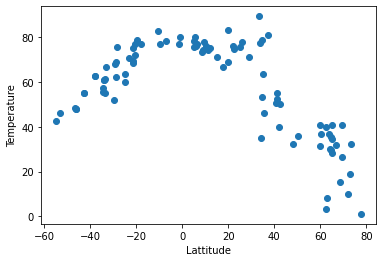

In [10]:
plt.scatter(city_data_df['Lattitude'],city_data_df['Temperature'])
plt.xlabel("Lattitude")
plt.ylabel("Temperature")
plt.show()



## Latitude vs. Humidity Plot

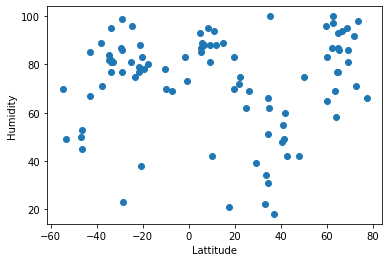

In [11]:
plt.scatter(city_data_df['Lattitude'],city_data_df['Humidity'])
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
plt.show()


## Latitude vs. Cloudiness Plot

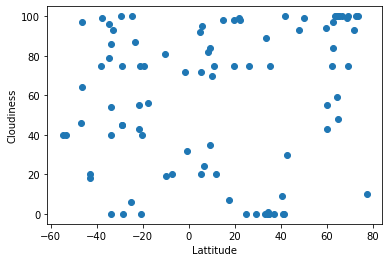

In [12]:
plt.scatter(city_data_df['Lattitude'],city_data_df['Cloudiness'])
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

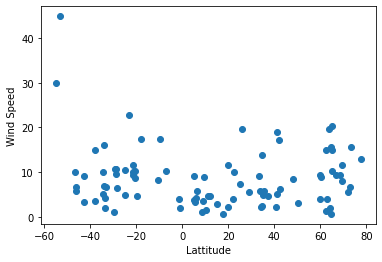

In [13]:
plt.scatter(city_data_df['Lattitude'],city_data_df['Wind Speed'])
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed")
plt.show()

## Linear Regression

In [14]:
# The second requirement is to compute the linear regression for each relationship. 
# This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude)
# and Southern Hemisphere (less than 0 degrees latitude):

northern_hemisphere_df=city_data_df[city_data_df['Lattitude']>=0]
northern_hemisphere_df
southern_hemisphere_df=city_data_df[city_data_df['Lattitude']<0]
southern_hemisphere_df

,City,Lattitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,mar del plata,-38.0023,-57.5575,62.73,89,75,14.97
2,geraldton,-28.7667,114.6000,62.49,86,45,9.62
4,saint-philippe,-21.3585,55.7679,69.39,79,43,10.07
6,tuatapere,-46.1333,167.6833,48.02,53,97,6.60
9,vaini,-21.2000,-175.2000,75.36,88,75,11.50
13,carnarvon,-24.8667,113.6333,63.72,81,6,10.51
18,isangel,-19.5500,169.2667,78.91,78,75,4.61
21,punta arenas,-53.1500,-70.9167,46.33,49,40,44.87
22,rikitea,-23.1203,-134.9692,70.74,75,87,22.77
25,mataura,-46.1927,168.8643,48.13,45,64,5.70


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

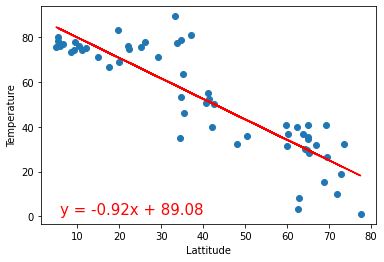

In [15]:
x_values = northern_hemisphere_df['Lattitude']
y_values = northern_hemisphere_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Temperature')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

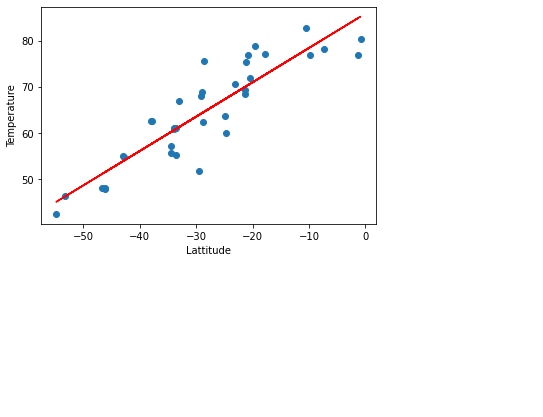

In [16]:
x_values = southern_hemisphere_df['Lattitude']
y_values = southern_hemisphere_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Temperature')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

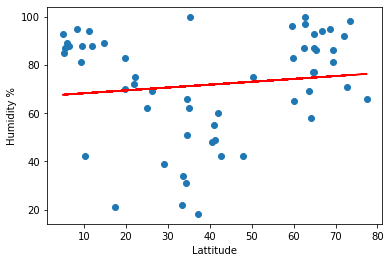

In [17]:
x_values = northern_hemisphere_df['Lattitude']
y_values = northern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Humidity %')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

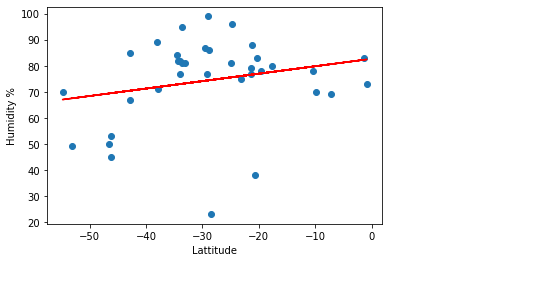

In [18]:
x_values = southern_hemisphere_df['Lattitude']
y_values = southern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Humidity %')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

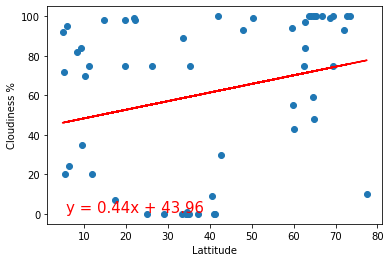

In [19]:
x_values = northern_hemisphere_df['Lattitude']
y_values = northern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness %')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

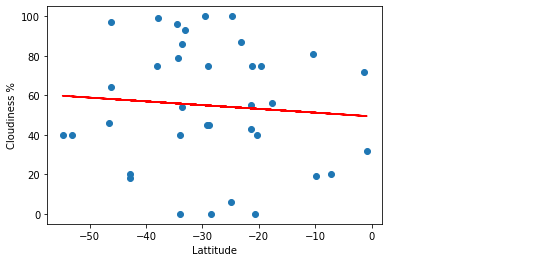

In [20]:
x_values = southern_hemisphere_df['Lattitude']
y_values = southern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness %')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

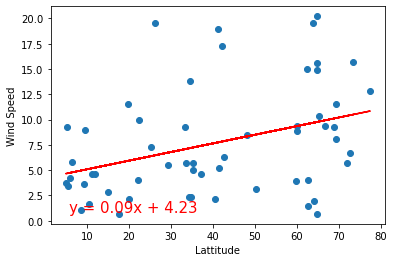

In [21]:
x_values = northern_hemisphere_df['Lattitude']
y_values = northern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

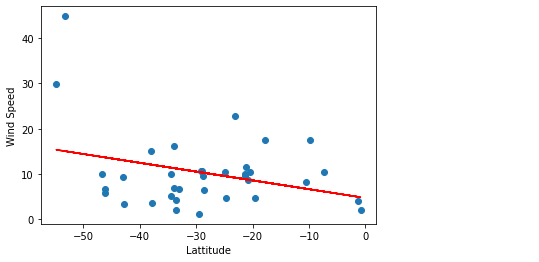

In [22]:
x_values = southern_hemisphere_df['Lattitude']
y_values = southern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed')
plt.show()